# Tekstanalyse 1: Opdeling af tekster, plots og RegEx
***
***
Keywords: `opdeling af tekster`, `plots`, `matplotlib`, `regular expressions`, `re`

Nye Python-udtryk:  `del`, `yield`, `.count()`, `.plot()`, `.bar()`, `.figsave()`
***
***
I det følgende fortsætter vi arbejdet med at tælle leksikalske enheder. Vi bygger videre på arbejdet med `data frames` og afprøver indledningsvis to forskellige strategier for opdeling af tekster i mindre enheder.

Vi gennemgår endnu et komplet `work flow` fra de indledendende forberedelser til analyse og datavisualisering. 

Nogle af elementerne vil være repetition af elementer fra tidligere notebooks.

Hvis der er kode sekvenser eller udtryk i ikke forstår, er det altid en god idé at bruge Google. Det kan give svar på det meste.

**Husk at kommentere eksemplerne**

# 1. Forberedelse

### Dependencies
Som altid begynder vi med at importere de nødvendige `libraries`. Udover `os`, `Numpy` og `Pandas` skal vi også bruge pakkerne `re`, der lader os arbejde med *Regular Expressions* og `matplotlib`, der lader os lave plots og diagrammer.

**Importer** pakken `re`. **Tilføj** selv koden i feltet nedenfor.

In [1]:
import os                       # os tillader os bl.a. at finde filplaceringer på computeren
import numpy as np              # Numpy leverer noget af matematikken, der ligger under Pandas 
import pandas as pd             # Pandas tillader os at importere, oprette og manipulere data frames
import matplotlib.pyplot as plt # Importerer underbiblioteket pyplot fra pakken matplotlib

In [2]:
import re

### Definition af pipelinefunktion
Herefter definerer vi de funktioner, vi skal bruge. Vi genbruger pipeline-funktionen `rens_ord`.


In [3]:
def rens_ord(text_0):
    text_1 = text_0.replace("\n"," ")
    text_2 = text_1.replace("."," ")
    text_3 = text_2.replace(","," ")
    text_4 = text_3.replace(":"," ")
    text_5 = text_4.replace("*"," ")
    text_6 = text_5.replace("–"," ")
    text_7 = text_6.replace("'"," ")
    text_8 = text_7.replace("”"," ")
    text_9 = text_8.replace("-"," ")
    text_10 = text_9.replace(";"," ")
    text_ren = text_10.replace("?"," ")
    text_lav = text_ren.lower()
    text_token = text_lav.split()
    return text_token

Vi får desuden brug for en funktion, der tager en tekst (som én streng) som input og splitter den ved linjeskift.

**Definér** selv funktionen. Den kan skrives med få linjer kode. Når I har defineret jeres egen funktion, kan I **sammenligne** med mit forslag, som I finder nederst i notebooken.

In [4]:
def split_linjer(text_0):
    text_linjer = text_0.split("\n")
    return text_linjer

### Import af tekster
I denne notebook skal vi arbejde med *Kongens Fald*. **Bemærk** den forkotede form, hvor `.read()`-kommandoen er koblet  direkte på `.open()`-kommandoen. **Læs** kodesekvensen bagfra.

In [5]:
kf_raw = open("Kongens_fald_prep.txt",  encoding = "utf8").read()

Inspicér indholdet af variablen - med og uden brug af af `print()`-kommandoen

In [6]:
print(kf_raw)

Kongens Fald

Johannes Vilhelm Jensen

1916

kapitel
Mikkel


Vejen bøjede tilvenstre over en Bro og ind gennem Serritslev By; Grøfterne
laa med mørkt Græs og gule Smaablomster, ude over Markerne hvilede hist og
her en hvid Blak, en Blomstertaage, i Skumringen. Solen var gaaet under, og
Luften stod kølig klar, skyløs men uden Stjærner.

Der kom et Hølæs kørende fra Landet ind i Serritslev By, langsomt og
gyngende paa den vanskelige Vej. Som det listede afsted i Tusmørket ind
gennem den snævre Landsbygade, lignede det et stort tottet, lavbenet Dyr,
der trisser af fordybet i Betragtninger og snuser til Jorden.

Læsset holdt udenfor Serritslev Kro; de svedige Heste vendte Hovedet
tilbage og smagte paa Bidslet, de kunde nok lide at staa. Kusken lindede
sig ned paa Hamlen, skrævede til Jorden og gjorde Tømmen fast. Saa vendte
han sig mod Bislaget og raabte ind og snød Næsen.

Er der nogen til færds -- kanske?

Hvad -- der gik Lys i Ruderne, havde de tændt Lys derinde? I det samme kom
en Pig

# 2. Opdeling af tekst: to forskellige strategier
Vi har tidligere arbejdet med en såkaldt *bag of words* strategi, hvor hver tekst blot behandles som en lang liste med ord. Med denne tilgang kan vi tælle og beskrive den samlede tekst. Hvis vi har brug for at undersøge, hvordan tekster og narrativer **udvikler** sig over tid eller tekstforløb, vil det imidlertid ofte være nødvendigt, særligt med længere tekster, at opdele teksten i mindre enheder.

I det følgende skal vi kigge på to forskellige strategier: a) opdel tekst i kapitler, b) opdel tekst i afmålte bidder.

## 2.a Opdeling af tekst i kaptler
Opdeling i kapitler kan være en fin strategi, hvis man arbejder med en overskuelig tekstmængde, fx én eller nogle få romaner.

Som forberedelse har jeg på forhånd indtastet **kapitel** umiddelbart før hver kapiteloverskrift i den rå `.txt`-fil, dvs. 42 gange i det aktuelle eksempel. Det er selvfølgelig en balance. Det vil være hurtigere end at kode det i Python, hvis der er tale om en overskuelige tekstmængde, men umuluigt, ved større tekstmængder.

Vi kan nu **splitte** teksten i kapitler vha. `.split()`-kommandoen, ved simpelthen at bed om at få teksten delt, hver gang, der står 'kapitel'.

In [7]:
kf_kap = kf_raw.split("kapitel")

**Hvilken** datatype er outputtet af `.split()`-funktionen? **Gæt** og **tjek** med `type()`.

In [8]:
type(kf_kap)

list

Vi kan se de første bidder af teksten, ved at indtaste `variabel`-navnet efterfulgt af en angivelse af, hvor stor en `slice`, vi vil se, fx `[0:3]`.

**Hvor mange** elementer fra listen får vi at se?

In [9]:
kf_kap[0:3]

['Kongens Fald\n\nJohannes Vilhelm Jensen\n\n1916\n\n',
 "\nMikkel\n\n\nVejen bøjede tilvenstre over en Bro og ind gennem Serritslev By; Grøfterne\nlaa med mørkt Græs og gule Smaablomster, ude over Markerne hvilede hist og\nher en hvid Blak, en Blomstertaage, i Skumringen. Solen var gaaet under, og\nLuften stod kølig klar, skyløs men uden Stjærner.\n\nDer kom et Hølæs kørende fra Landet ind i Serritslev By, langsomt og\ngyngende paa den vanskelige Vej. Som det listede afsted i Tusmørket ind\ngennem den snævre Landsbygade, lignede det et stort tottet, lavbenet Dyr,\nder trisser af fordybet i Betragtninger og snuser til Jorden.\n\nLæsset holdt udenfor Serritslev Kro; de svedige Heste vendte Hovedet\ntilbage og smagte paa Bidslet, de kunde nok lide at staa. Kusken lindede\nsig ned paa Hamlen, skrævede til Jorden og gjorde Tømmen fast. Saa vendte\nhan sig mod Bislaget og raabte ind og snød Næsen.\n\nEr der nogen til færds -- kanske?\n\nHvad -- der gik Lys i Ruderne, havde de tændt Lys deri

Ved at inspicere outputtet, kan vi se, at første element på listen udgøres af **titel** og **forfatternavn**. Da vi kun skal bruge selve kapitlerne, skal vi have slettet dette element fra listen. Dette kan gøres med `del`-kommandoen.

**Indtast** kodesekvensen `del kf_kap[0]` i kodefeltet nedenfor. Sekvensen læses: Slet elementet med index 0 (dvs element 1) fra listen gemt under variabelnavnet *kf_kap*. 

In [10]:
del kf_kap[0]

In [11]:
print(kf_kap)

["\nMikkel\n\n\nVejen bøjede tilvenstre over en Bro og ind gennem Serritslev By; Grøfterne\nlaa med mørkt Græs og gule Smaablomster, ude over Markerne hvilede hist og\nher en hvid Blak, en Blomstertaage, i Skumringen. Solen var gaaet under, og\nLuften stod kølig klar, skyløs men uden Stjærner.\n\nDer kom et Hølæs kørende fra Landet ind i Serritslev By, langsomt og\ngyngende paa den vanskelige Vej. Som det listede afsted i Tusmørket ind\ngennem den snævre Landsbygade, lignede det et stort tottet, lavbenet Dyr,\nder trisser af fordybet i Betragtninger og snuser til Jorden.\n\nLæsset holdt udenfor Serritslev Kro; de svedige Heste vendte Hovedet\ntilbage og smagte paa Bidslet, de kunde nok lide at staa. Kusken lindede\nsig ned paa Hamlen, skrævede til Jorden og gjorde Tømmen fast. Saa vendte\nhan sig mod Bislaget og raabte ind og snød Næsen.\n\nEr der nogen til færds -- kanske?\n\nHvad -- der gik Lys i Ruderne, havde de tændt Lys derinde? I det samme kom\nen Pige frem i Døren. Kusken ønske

### Lav en `data frame`
Vi kan nu lave en `data frame` ud af kapitlerne på listen med følgende kommando:

`df_kap = pd.DataFrame({"Kapitel_raw": kf_kap})`

**Indtast** koden i feltet nedenfor. **Læs** kodesekvensen og **diskutér** hvad de forskellige dele betyder. **Hvad** betyder fx de de forskellige slags parenteser?

In [12]:
df_kap = pd.DataFrame({"Kapitel_raw": kf_kap})

**Inspicér** data-framen med `df_kap.head()`-kommandoen.

In [13]:
df_kap.head()

,Kapitel_raw
0,\nMikkel\n\n\nVejen bøjede tilvenstre over en ...
1,\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...
2,"\nDrømmeren\n\n\nDet var langt op paa Dagen, d..."
3,\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...
4,\n\nMikkel synker\n\n\nGraveren kom op paa Kir...


### Tilføj overskrifter
Hvis vi printer den rå `.txt`-fil, der er hentet fra *Guthenberg Project*, kan vi se, at den er pænt opstillet, og at kapitel-overskrifterne står på en linje for sig selv. Dette kan vi udnytte, så vi **slipper for** at lave en håndskrevet liste, med alle 42 kapitel-overskrifter.

In [14]:
print(kf_raw)

Kongens Fald

Johannes Vilhelm Jensen

1916

kapitel
Mikkel


Vejen bøjede tilvenstre over en Bro og ind gennem Serritslev By; Grøfterne
laa med mørkt Græs og gule Smaablomster, ude over Markerne hvilede hist og
her en hvid Blak, en Blomstertaage, i Skumringen. Solen var gaaet under, og
Luften stod kølig klar, skyløs men uden Stjærner.

Der kom et Hølæs kørende fra Landet ind i Serritslev By, langsomt og
gyngende paa den vanskelige Vej. Som det listede afsted i Tusmørket ind
gennem den snævre Landsbygade, lignede det et stort tottet, lavbenet Dyr,
der trisser af fordybet i Betragtninger og snuser til Jorden.

Læsset holdt udenfor Serritslev Kro; de svedige Heste vendte Hovedet
tilbage og smagte paa Bidslet, de kunde nok lide at staa. Kusken lindede
sig ned paa Hamlen, skrævede til Jorden og gjorde Tømmen fast. Saa vendte
han sig mod Bislaget og raabte ind og snød Næsen.

Er der nogen til færds -- kanske?

Hvad -- der gik Lys i Ruderne, havde de tændt Lys derinde? I det samme kom
en Pig

For at få overskrifterne trukket ud skal vi gøre følgende:
1. Splitte kapitlerne i linjer med den funktionen, vi definerede ovenfor.
1. Snuppe den første linje (overskriften) i hvert kapitel
1. Lave en liste med overskrifterne
1. Rense overskriften for støj, fx ekstra blanktegn.
1. Tilføje listen med de rensede overskrifter til dataframen.

Først anvender vi vores linje-split-funktion på kolonne 'Kapitel_raw' i vores data-frame **df_kap**. Dette kan gøres med en kodelinje.

`df_kap["Linjer"] = df_kap.Kapitel_raw.apply(split_linjer)`

**Indtast** kodesekvensen i feltet nedenfor. **Læs** koden og **diskutér** hvad de enkelte dele betyder.

In [15]:
df_kap["Linjer"] = df_kap.Kapitel_raw.apply(split_linjer)

Hvis vi **inspicerer** indholdet af kolonnen, fx de første ti rækker, kan vi nu se, at hver række inderholder en liste, hvoraf et af de første elementer er kapitlets overskrift.

In [16]:
df_kap["Linjer"][0:10]

0    [, Mikkel, , , Vejen bøjede tilvenstre over en...
1    [, København ved Nat, , , Mikkel Thøgersen boe...
2    [, Drømmeren, , , Det var langt op paa Dagen, ...
3    [, Foraars Smærte, , , Alt hvad Mikkel Thøgers...
4    [, , Mikkel synker, , , Graveren kom op paa Ki...
5    [, Otte Iversens Fald, , , København blev mere...
6    [, , Stenene bæres af By, , , Næste Dag var Hæ...
7    [, Hjemkomst, , , Det var i Høbjærgningstiden,...
8    [, , Længsel, , , Mikkel var kommen tilbage ti...
9    [, Tordenvejret, , , En Nat vaagnede Mikkel ve...
Name: Linjer, dtype: object

Vi kan dog også se, at der er kommet noget støj med i form at nogle tomme strenge (de tomme pladser mellem kommaerne). Støj kan opstå på forskellige måder, når forskellige tekst-formater konverteres til strenge og lister. Det er derfor, vi som regel sletter blanktegn, linjeskift osv. i forbindelse med pre-processing.

Hvis vi inspicerer hele kolonnen, kan vi se, at vi er sikre på at få overskriften med, hvis vi snupper, de tre første elementer på hver liste.

I kodesekvensen nedenfor laver vi først en tom liste. Herefter laver et `for loop`, der snupper de tre første elemnter fra hver række i kolonnen.

**Læs** kodesekvensen, og **diskutér** hvad de forskellige elementer betyder.

In [17]:
overskrifter_raw = []
for x in df_kap["Linjer"]:
    overskrifter_raw.append(x[0:3])

Ved at inspicere listeten **overskrifter_raw**, kan vi se, at vi nu har en liste af lister, og at alle listerne indholder tre elementer, nemlig overskriften samt nogle tomme *støjelementer* (' ').

In [18]:
print(overskrifter_raw)

[['', 'Mikkel', ''], ['', 'København ved Nat', ''], ['', 'Drømmeren', ''], ['', 'Foraars Smærte', ''], ['', '', 'Mikkel synker'], ['', 'Otte Iversens Fald', ''], ['', '', 'Stenene bæres af By'], ['', 'Hjemkomst', ''], ['', '', 'Længsel'], ['', 'Tordenvejret', ''], ['', 'Hævnen', ''], ['', '', 'Gengældelsen'], ['', 'Døden', ''], ['', 'Et Gensyn', ''], ['', 'Axel rider frem', ''], ['', '', 'Hjemkomst paany'], ['', 'Consumatum est', ''], ['', 'Galejen', ''], ['', 'Historiens Fælde', ''], ['', 'Lucie', ''], ['', 'Blodbadet', ''], ['', 'Miserere', ''], ['', 'Den lille Skæbne', ''], ['', 'I Urskoven', ''], ['', 'Kapslen', ''], ['', 'Hjemfalden', ''], ['', '', 'Den danske Død'], ['', 'Kongen falder', ''], ['', 'Skatten', ''], ['', '', 'Inger'], ['', '', 'Atter Hjemkomst'], ['', '', 'Den røde Hane'], ['', '', 'Nederlaget'], ['', 'Tiden', ''], ['', 'Jakob og Ide', ''], ['', 'Hjemløs', ''], ['', 'Paa Sønderborg', ''], ['', '', 'Carolus'], ['', 'Ilden', ''], ['', 'Vinterens Røst', ''], ['', 'Grot

Disse kan let fjernes. Vi laver en ny tom liste med navnet **overskrifter**, til hvilken vi med et `for loop` tilføjer alle de elementer fra listerne, der **ikke** (!=) er tomme.

**Læs** kodesekvensen og **diskutér** hvad de enkelte dele betyder.

In [19]:
overskrifter = []                    #Laver en tom liste
for x in overskrifter_raw:           #for x i den rå liste
    for y in x:                      #for y i x
        if y != "":                  # hvis y ikke er sand med ""
            overskrifter.append(y)   # puttes det i listen overskrifter

**Inspicér** den nye liste og **tjek**, at den kun indeholder overskrifterne. 

In [20]:
print(overskrifter)

['Mikkel', 'København ved Nat', 'Drømmeren', 'Foraars Smærte', 'Mikkel synker', 'Otte Iversens Fald', 'Stenene bæres af By', 'Hjemkomst', 'Længsel', 'Tordenvejret', 'Hævnen', 'Gengældelsen', 'Døden', 'Et Gensyn', 'Axel rider frem', 'Hjemkomst paany', 'Consumatum est', 'Galejen', 'Historiens Fælde', 'Lucie', 'Blodbadet', 'Miserere', 'Den lille Skæbne', 'I Urskoven', 'Kapslen', 'Hjemfalden', 'Den danske Død', 'Kongen falder', 'Skatten', 'Inger', 'Atter Hjemkomst', 'Den røde Hane', 'Nederlaget', 'Tiden', 'Jakob og Ide', 'Hjemløs', 'Paa Sønderborg', 'Carolus', 'Ilden', 'Vinterens Røst', 'Grotte', 'Spillemandens Afsked']


Hvis I kigger godt efter, kan I se, at "Johannes Vilhelm Jensen", dvs. forfatternavnet har sneget sig med på listen. 

Diskutér, hvordan det er sket.

Da det ikke er en overskrift, skal elementet fjernes. Det gøres nemt med kommandoen `.remove()`-kommandoen der tillader os at fjerne elementer fra lister.

Indtast sekvensen `overskrifter.remove("Johannes Vilhelm Jensen")` i feltet nedenfor og fjern elementet.

Inspicér derefter variablen for at tjekke, at elementet er blevet fjernet.

In [21]:
#er fjernet ved delete funktionen af kap 0

Nu mangler vi kun at tilføje den nye liste til vores `data frame`. Dette gøres med følgende sekvens:

`df_kap.loc[:,"Overskrift"] = overskrifter`

**Afprøv** sekvensen i feltet nedenfor og **diskutér**, hvad de enkelte dele betyder.

In [22]:
df_kap.loc[:,"Overskrift"] = overskrifter

Vi får desuden brug for en kolonne med de rensede kapitler. **Brug** kodesekvensen nedenfor:

`df_kap.loc[:,"Kapitel_ord"] = df_kap.Kapitel_raw.apply(rens_ord)`


**Inspicér** data-framen med `df_kap.head()`-kommandoen.

In [23]:
df_kap.loc[:,"Kapitel_ord"] = df_kap.Kapitel_raw.apply(rens_ord)

In [49]:
df_kap.head()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer,antalMikkel,antalChristiern,antalKongen,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalKongChr,antalDød,antalLiv
0,Mikkel,"[mikkel, vejen, bøjede, tilvenstre, over, en, ...",\nMikkel\n\n\nVejen bøjede tilvenstre over en ...,"[, Mikkel, , , Vejen bøjede tilvenstre over en...",24,0,0,12,0,0,0,0,0,0,1,1
1,København ved Nat,"[københavn, ved, nat, mikkel, thøgersen, boede...",\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...,"[, København ved Nat, , , Mikkel Thøgersen boe...",41,3,0,3,1,0,0,0,0,3,0,5
2,Drømmeren,"[drømmeren, det, var, langt, op, paa, dagen, d...","\nDrømmeren\n\n\nDet var langt op paa Dagen, d...","[, Drømmeren, , , Det var langt op paa Dagen, ...",42,0,0,2,2,0,0,0,0,0,1,1
3,Foraars Smærte,"[foraars, smærte, alt, hvad, mikkel, thøgersen...",\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...,"[, Foraars Smærte, , , Alt hvad Mikkel Thøgers...",36,0,1,29,5,2,0,0,0,1,3,3
4,Mikkel synker,"[mikkel, synker, graveren, kom, op, paa, kirke...",\n\nMikkel synker\n\n\nGraveren kom op paa Kir...,"[, , Mikkel synker, , , Graveren kom op paa Ki...",12,0,0,0,2,0,0,0,0,0,3,1


In [50]:
df_kap.tail()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer,antalMikkel,antalChristiern,antalKongen,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalKongChr,antalDød,antalLiv
37,Carolus,"[carolus, mikkel, thøgersen, red, over, vindeb...",\n\nCarolus\n\n\nMikkel Thøgersen red over Vin...,"[, , Carolus, , , Mikkel Thøgersen red over Vi...",54,1,12,0,0,0,0,0,0,13,4,6
38,Ilden,"[ilden, det, var, aften, da, mikkel, tumlede, ...","\nIlden\n\n\nDet var Aften, da Mikkel tumlede ...","[, Ilden, , , Det var Aften, da Mikkel tumlede...",10,0,0,0,0,0,0,0,0,0,2,6
39,Vinterens Røst,"[vinterens, røst, kongen, havde, befalet, kuré...",\nVinterens Røst\n\n\nKongen havde befalet Kur...,"[, Vinterens Røst, , , Kongen havde befalet Ku...",46,2,46,0,0,1,0,0,7,48,3,8
40,Grotte,"[grotte, hver, nat, kom, en, ringende, søndren...","\nGrotte\n\n\nHver Nat kom en ringende, søndre...","[, Grotte, , , Hver Nat kom en ringende, søndr...",1,0,0,0,0,0,0,0,0,0,1,1
41,Spillemandens Afsked,"[spillemandens, afsked, mikkel, thøgersen, laa...",\n\nSpillemandens Afsked\n\n\nMikkel Thøgersen...,"[, , Spillemandens Afsked, , , Mikkel Thøgerse...",11,0,9,0,0,0,0,0,0,9,8,4


Vi kan omarrangere kolonnerne med `.reindex()`-kommandoen.

Diskutér - hvad kodesekvensen gør.

In [24]:
df_kap = df_kap.reindex(columns = ['Overskrift', 'Kapitel_ord','Kapitel_raw', 'Linjer']) #arrangerer kolonnerne - medtager kun dem, der skrives ind?
df_kap.head()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer
0,Mikkel,"[mikkel, vejen, bøjede, tilvenstre, over, en, ...",\nMikkel\n\n\nVejen bøjede tilvenstre over en ...,"[, Mikkel, , , Vejen bøjede tilvenstre over en..."
1,København ved Nat,"[københavn, ved, nat, mikkel, thøgersen, boede...",\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...,"[, København ved Nat, , , Mikkel Thøgersen boe..."
2,Drømmeren,"[drømmeren, det, var, langt, op, paa, dagen, d...","\nDrømmeren\n\n\nDet var langt op paa Dagen, d...","[, Drømmeren, , , Det var langt op paa Dagen, ..."
3,Foraars Smærte,"[foraars, smærte, alt, hvad, mikkel, thøgersen...",\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...,"[, Foraars Smærte, , , Alt hvad Mikkel Thøgers..."
4,Mikkel synker,"[mikkel, synker, graveren, kom, op, paa, kirke...",\n\nMikkel synker\n\n\nGraveren kom op paa Kir...,"[, , Mikkel synker, , , Graveren kom op paa Ki..."


## 2.b Opdeling af tekst i afmålte bidder

Hvis vi arbejder med store mængder af tekster, eller af andre grunde ønsker en anden inddeling end kapitler, er en god strategi, at inddele teksten en en række lige store bidder.

I *Kongens fald* er der 42 kapitler. I det følgende forsøger vi med en mere finmasket inddeling af roman. Vi kan fx forsøge med en indeling i cirka halvt så store bidder. Vi kan let regne størrelsen ud på de enkelte bidder.

Afprøv kode sekvensen i feltet nedenfor. **Læs** kodesekvensen og **diskutér** hvad de enkelte dele betyder. Hvad erdet de to tal, vi får som putput, måler?

In [25]:
kf_ord = rens_ord(kf_raw)
print(len(kf_ord)) #antal ord i listen
print(len(kf_ord)/80) #antal ord pr bid. deler teksten i 80 dele?

70053
875.6625


Vi kan nu lave funktioner, der inddeler teksten i afmålte bidder. Funktionen tager som **input** en **ordliste** og en angivelse af **antallet** ord per bid. Vi bruger `yield`-kommandoen i dette tilfælde, fordi den i modsætning `return`-kommandoen, kan give os mere end ét output. Her spytter den en tekstbidder på 900 ord ud, indtil der ikke er flere ord tilbage i input-teksten.

**Afprøv** eksemplet nedenfor og **diskutér** hvad de forskellige dele betyder.

In [26]:
def opdel_txt(txt, bite_size):
    for i in range(0, len(txt), bite_size):
        yield txt[i:i + bite_size]

Herefter **anvender** vi funktionen og **tilføjer** outputtet til en liste.

**Afprøv** eksemplet nedenfor og **diskutér** hvad de forskellige dele betyder.

In [27]:
kf_opdelt = list(opdel_txt(kf_ord, 900))

Herefter laver vi en ny `data frame` ud af listen med tekstbidder.

**Afprøv** eksemplet nedenfor og **diskutér** hvad de forskellige dele betyder.

In [28]:
df_del = pd.DataFrame({"Txt_del":kf_opdelt})
df_del

,Txt_del
0,"[kongens, fald, johannes, vilhelm, jensen, 191..."
1,"[i, jylland, han, følte, sig, selv, staa, klej..."
2,"[sig, tilbage, og, tog, afsked, saa, snart, de..."
3,"[dreje, om, ad, købmagergade, for, at, gaa, hj..."
4,"[bøjede, ind, i, et, berygtet, smug, nede, ved..."
...,...
73,"[han, dansede, paa, de, brændende, planker, pl..."
74,"[glattedes, han, for, op, et, par, gange, i, h..."
75,"[brynene, og, om, munden, og, med, vilde, øjek..."
76,"[dig, grønne, skove, fulde, af, sangfugle, vi,..."


# 3. Ordfrekvens

## 3.a Ordfrekvens i kapitler

Vi har nu vores to `data frames` klar og kan begynde at tælle. I det følgende skal vi forsøge at skabe **overblik** over, hvor i romanen, de forskellige karakterer optræder.

Vi **definerer** først en funktion, der som **argument** tager den tekstbid vi vil søge i, og den `string` vi vil søge efter.

In [29]:
def find_navn(txt,navn):
    antal = txt.count(navn)
    return antal

I kodesekvensen nedenfor afprøver vi funktionen på vores `data frame` og søger efter strengen **'mikkel'**. Bemærk den særlige notation `args=('mikkel',)`. Dette er nødvendigt, når vi anvender funktionen inden i `apply()`. **Husk** kommaet efter søgestrengen, det skal med selvom der kun er ét ekstra argument.

**Afprøv** kodesekvensen og **diskutér** hvad de enkelte dele betyder.

In [30]:
df_kap["antalMikkel"]  = df_kap.Kapitel_ord.apply(find_navn, args=('mikkel',))

**Inspicér** data-framen med `.head()`-kommandoen og tjek, at alt ser rigtigt ud.

In [51]:
df_kap.head()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer,antalMikkel,antalChristiern,antalKongen,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalKongChr,antalDød,antalLiv
0,Mikkel,"[mikkel, vejen, bøjede, tilvenstre, over, en, ...",\nMikkel\n\n\nVejen bøjede tilvenstre over en ...,"[, Mikkel, , , Vejen bøjede tilvenstre over en...",24,0,0,12,0,0,0,0,0,0,1,1
1,København ved Nat,"[københavn, ved, nat, mikkel, thøgersen, boede...",\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...,"[, København ved Nat, , , Mikkel Thøgersen boe...",41,3,0,3,1,0,0,0,0,3,0,5
2,Drømmeren,"[drømmeren, det, var, langt, op, paa, dagen, d...","\nDrømmeren\n\n\nDet var langt op paa Dagen, d...","[, Drømmeren, , , Det var langt op paa Dagen, ...",42,0,0,2,2,0,0,0,0,0,1,1
3,Foraars Smærte,"[foraars, smærte, alt, hvad, mikkel, thøgersen...",\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...,"[, Foraars Smærte, , , Alt hvad Mikkel Thøgers...",36,0,1,29,5,2,0,0,0,1,3,3
4,Mikkel synker,"[mikkel, synker, graveren, kom, op, paa, kirke...",\n\nMikkel synker\n\n\nGraveren kom op paa Kir...,"[, , Mikkel synker, , , Graveren kom op paa Ki...",12,0,0,0,2,0,0,0,0,0,3,1


Herefter kan vi gøre det samme for de andre personer vi er interesserede i:

In [31]:
df_kap["antalChristiern"]  = df_kap.Kapitel_ord.apply(find_navn, args=('christiern',))
df_kap["antalKongen"]  = df_kap.Kapitel_ord.apply(find_navn, args=('kongen',))
df_kap["antalOtte"]  = df_kap.Kapitel_ord.apply(find_navn, args=('otte',))
df_kap["antalSusanna"]  = df_kap.Kapitel_ord.apply(find_navn, args=('susanna',))
df_kap["antalMette"]  = df_kap.Kapitel_ord.apply(find_navn, args=('mette',))
df_kap["antalInger"]  = df_kap.Kapitel_ord.apply(find_navn, args=('inger',))
df_kap["antalAxel"]  = df_kap.Kapitel_ord.apply(find_navn, args=('axel',))
df_kap["antalIde"]  = df_kap.Kapitel_ord.apply(find_navn, args=('ide',))
df_kap["antalChristiern"]  = df_kap.Kapitel_ord.apply(find_navn, args=('christiern',))

Da 'kongen' og 'christiern' refererer til samme person, kan vi vælge at **lægge de to kolonner sammen**, så vi får en kolonne med det samlede antal gange Kong Christiern optræder i teksten.

**Afprøv** kodesekvensen nedenfor og **diskutér** hvad de forskellige dele betyder.

In [53]:
df_kap["antalKongChr"] = df_kap["antalChristiern"] + df_kap["antalKongen"]

**Inspicér** data-framen med `.head()`-kommandoen og tjek, at alt ser rigtigt ud.

In [54]:
df_kap.head()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer,antalMikkel,antalChristiern,antalKongen,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalKongChr,antalDød,antalLiv
0,Mikkel,"[mikkel, vejen, bøjede, tilvenstre, over, en, ...",\nMikkel\n\n\nVejen bøjede tilvenstre over en ...,"[, Mikkel, , , Vejen bøjede tilvenstre over en...",24,0,0,12,0,0,0,0,0,0,1,1
1,København ved Nat,"[københavn, ved, nat, mikkel, thøgersen, boede...",\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...,"[, København ved Nat, , , Mikkel Thøgersen boe...",41,3,0,3,1,0,0,0,0,3,0,5
2,Drømmeren,"[drømmeren, det, var, langt, op, paa, dagen, d...","\nDrømmeren\n\n\nDet var langt op paa Dagen, d...","[, Drømmeren, , , Det var langt op paa Dagen, ...",42,0,0,2,2,0,0,0,0,0,1,1
3,Foraars Smærte,"[foraars, smærte, alt, hvad, mikkel, thøgersen...",\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...,"[, Foraars Smærte, , , Alt hvad Mikkel Thøgers...",36,0,1,29,5,2,0,0,0,1,3,3
4,Mikkel synker,"[mikkel, synker, graveren, kom, op, paa, kirke...",\n\nMikkel synker\n\n\nGraveren kom op paa Kir...,"[, , Mikkel synker, , , Graveren kom op paa Ki...",12,0,0,0,2,0,0,0,0,0,3,1


## 3.b Ordfrekvens i bidder
Vi kan nu let gentage disse operationer på dataframen **df_del**, der indeholder teksten inddelt i mindre bidder.

**Anvend** funktionen `find_navn` på romanens hovedpersoner (se navnene ovenfor) og tilføj optællingerne til dataframen.

Når I har **prøvet selv** kan I sammenligne med mit **løsningsforslag**, som I finder i bunden af notebooken.

In [56]:
df_del["antalKongen"]  = df_del.Txt_del.apply(find_navn, args=('kongen',))
df_del["antalMikkel"]  = df_del.Txt_del.apply(find_navn, args=('mikkel',))
df_del["antalOtte"]  = df_del.Txt_del.apply(find_navn, args=('otte',))
df_del["antalSusanna"]  = df_del.Txt_del.apply(find_navn, args=('susanna',))
df_del["antalMette"]  = df_del.Txt_del.apply(find_navn, args=('mette',))
df_del["antalInger"]  = df_del.Txt_del.apply(find_navn, args=('inger',))
df_del["antalAxel"]  = df_del.Txt_del.apply(find_navn, args=('axel',))
df_del["antalIde"]  = df_del.Txt_del.apply(find_navn, args=('ide',))
df_del["antalChristiern"]  = df_del.Txt_del.apply(find_navn, args=('christiern',)) #fra ulfs løsningsforslag"

df_del["antalKongChr"] = df_del["antalChristiern"] + df_del["antalKongen"]

df_del.head()

,Txt_del,antalKongen,antalMikkel,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalChristiern,antalKongChr
0,"[kongens, fald, johannes, vilhelm, jensen, 191...",0,11,1,0,0,0,0,0,0,0
1,"[i, jylland, han, følte, sig, selv, staa, klej...",0,12,11,0,0,0,0,0,0,0
2,"[sig, tilbage, og, tog, afsked, saa, snart, de...",0,20,0,1,0,0,0,0,0,0
3,"[dreje, om, ad, købmagergade, for, at, gaa, hj...",0,22,2,0,0,0,0,0,2,2
4,"[bøjede, ind, i, et, berygtet, smug, nede, ved...",0,21,1,1,0,0,0,0,1,1


# 4. Line plot og bar plot

Vi har nu to datasæt med en masse data, og det kan være vanskeligt at se ud af tallene i kolonnerne, hvor og hvor meget personerne optræder i teksten. Det er derfor ofte en god idé at **plotte** sine data, for visualiseringer, fx linje- eller søjle diagrammer, ofte giver et godt overblik.

Pakken `matplotlib`, som vi importerede indledningsvis, gør det nemt at plotte data fra en `data frame`. I det følgende skal vi afprøve kommandoerne `.plot()` og `.bar()`. 

Koden er relativt let at læse. 

**Afprøv** eksemplerne nedenfor. **Gennemgå** hele sekvensen og **diskutér**, hvad **alle** delene betyder.

## 4.a Plot kapitler

Vi lægger ud med at plotte indholdet af data-framen `df_kap`, der indeholder teksten inddelt i kapitler.

#### Linjediagram

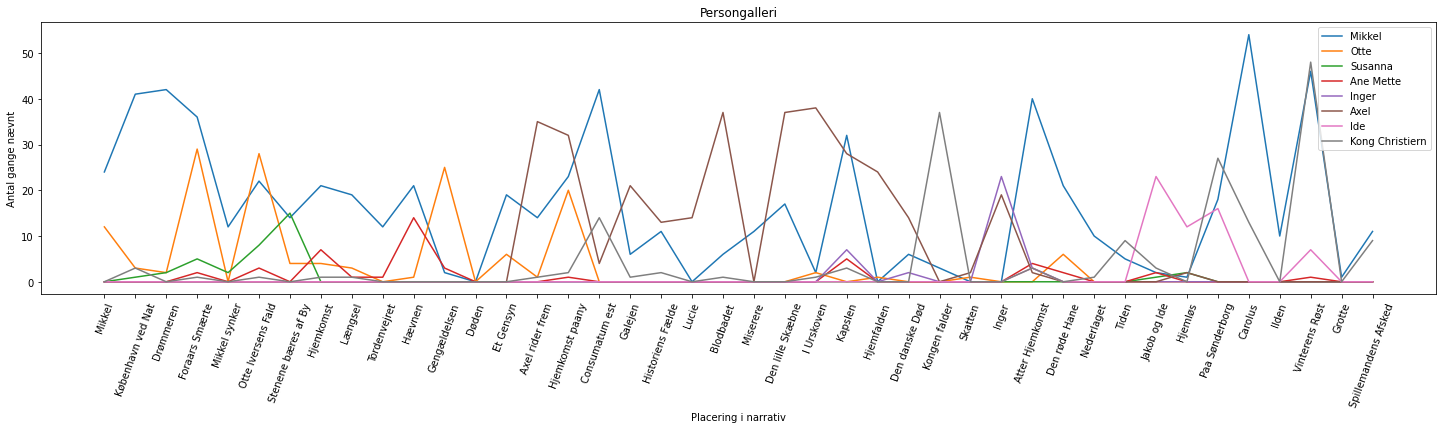

In [62]:
plt.figure(figsize=(25,5))

plt.title("Persongalleri")

plt.plot(df_kap.Overskrift,df_kap.antalMikkel, label="Mikkel")
plt.plot(df_kap.Overskrift,df_kap.antalOtte, label="Otte")
plt.plot(df_kap.Overskrift,df_kap.antalSusanna, label="Susanna")
plt.plot(df_kap.Overskrift,df_kap.antalMette, label="Ane Mette")
plt.plot(df_kap.Overskrift,df_kap.antalInger, label="Inger")
plt.plot(df_kap.Overskrift,df_kap.antalAxel, label="Axel")
plt.plot(df_kap.Overskrift,df_kap.antalIde, label="Ide")
plt.plot(df_kap.Overskrift,df_kap.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")
plt.xticks(rotation=70) # Vrider kapitelnavnene, så de kan være på nederste linje. Prøv at fjene denne linje. pisse smart!!

plt.legend()
plt.savefig("kf_kap_linjer.jpg", bbox_inches = "tight", dpi=200) # Argumentet 'tight' sikrer at hele billedet gemmes. Man kan ellers af og til risikere, at kanterne beskæres, så fx teksten i bunden ikke kommer med.
plt.show()

#### Søjlediagram
**Samme** data, **nyt** diagram

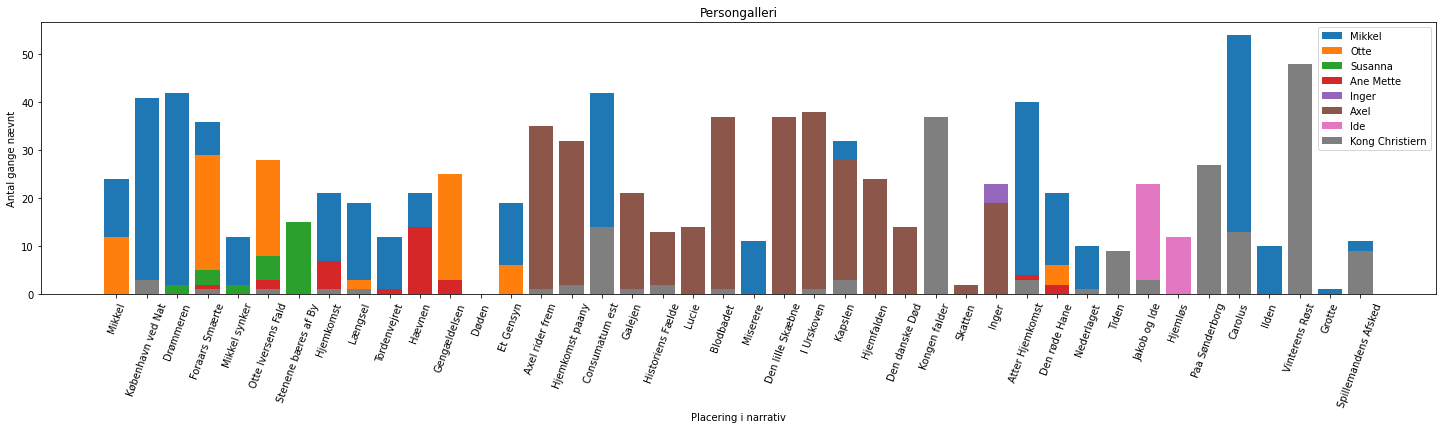

In [34]:
plt.figure(figsize=(25,5))

plt.title("Persongalleri")

plt.bar(df_kap.Overskrift,df_kap.antalMikkel, label="Mikkel")
plt.bar(df_kap.Overskrift,df_kap.antalOtte, label="Otte")
plt.bar(df_kap.Overskrift,df_kap.antalSusanna, label="Susanna")
plt.bar(df_kap.Overskrift,df_kap.antalMette, label="Ane Mette")
plt.bar(df_kap.Overskrift,df_kap.antalInger, label="Inger")
plt.bar(df_kap.Overskrift,df_kap.antalAxel, label="Axel")
plt.bar(df_kap.Overskrift,df_kap.antalIde, label="Ide")
plt.bar(df_kap.Overskrift,df_kap.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")
plt.xticks(rotation=70)

plt.legend()
plt.savefig("kf_kap_stolpe.png", bbox_inches = "tight", dpi=200)
plt.show()

## 4.b Plot bidder

Vi kan nu let plotte dataframen **df_del**, der indeholder teksten inddelt i mindre bidder.

**Anvend** samme fremgangsmåde som ovenfor og lav et **linjediagram** og et **søjlediagram** med indholdet af kolonnerne i **df_del**.

Når I har **prøvet selv** kan I sammenligne med mit **løsningsforslag**, som I finder i bunden af notebooken.

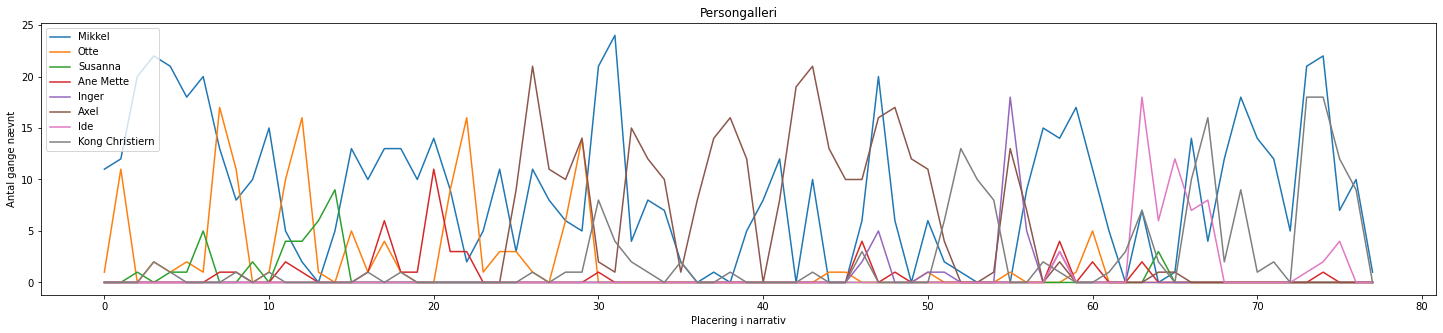

In [63]:
plt.figure(figsize=(25,5))

plt.title("Persongalleri")

plt.plot(df_del.index,df_del.antalMikkel, label="Mikkel")
plt.plot(df_del.index,df_del.antalOtte, label="Otte")
plt.plot(df_del.index,df_del.antalSusanna, label="Susanna")
plt.plot(df_del.index,df_del.antalMette, label="Ane Mette")
plt.plot(df_del.index,df_del.antalInger, label="Inger")
plt.plot(df_del.index,df_del.antalAxel, label="Axel")
plt.plot(df_del.index,df_del.antalIde, label="Ide")
plt.plot(df_del.index,df_del.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")

plt.legend()
plt.savefig("kf_dele_stolpe.pdf", bbox_inches = "tight", dpi=200)
plt.show()

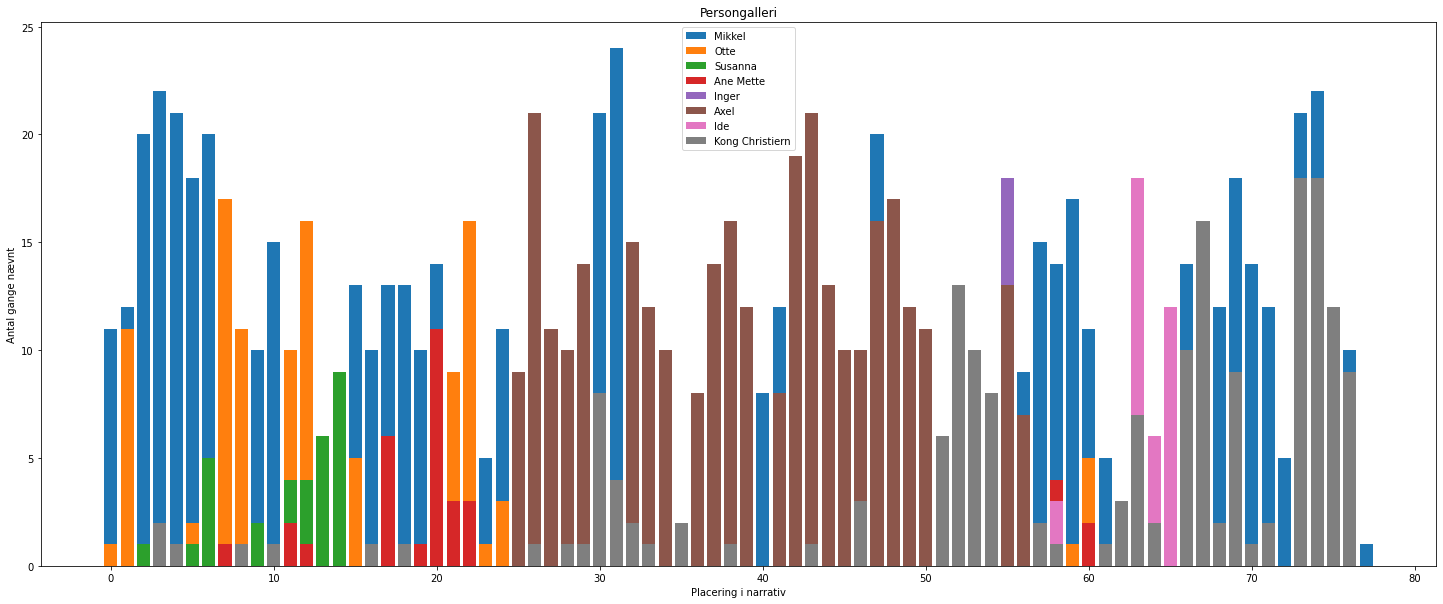

In [68]:
plt.figure(figsize=(25,10))

plt.title("Persongalleri")

plt.bar(df_del.index,df_del.antalMikkel, label="Mikkel")
plt.bar(df_del.index,df_del.antalOtte, label="Otte")
plt.bar(df_del.index,df_del.antalSusanna, label="Susanna")
plt.bar(df_del.index,df_del.antalMette, label="Ane Mette")
plt.bar(df_del.index,df_del.antalInger, label="Inger")
plt.bar(df_del.index,df_del.antalAxel, label="Axel")
plt.bar(df_del.index,df_del.antalIde, label="Ide")
plt.bar(df_del.index,df_del.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")

plt.legend()
plt.savefig("kf_dele_stolpe.png", bbox_inches = "tight", dpi=200)
plt.show()

# 5. Regular Expressions
Med `regular expressions` er det let at matche og finde leksikalske elementer i en tekst.

Hvis I følger linket, kan I se en oversigt og de forskellige RegEx-koder:

https://cheatography.com//davechild/cheat-sheets/regular-expressions/pdf/

Som tekst eksempel skal vi bruge en mail. 

I kodesekvensen nedenfor indlæses teksteksemplet.

In [35]:
mail_raw = 'Ulf Dalvad Berthelsen - udb@cc.au.dk <do-not-reply@blackboard.au.dk>\n\nF21 - Aktuelt forskningsemne:Tæl din tekst: Introduktion til digital tekstanalyse og digital humaniora - Hold - AARHUS[131202U008]: Zoom-link\nUlf Dalvad Berthelsen is inviting you to a scheduled Zoom meeting.\n\nTopic: F21 - Aktuelt forskningsemne:Tæl din tekst: Introduktion til digital tekstanalyse og digital humaniora - Hold - AARHUS[131202U008]\nTime: Apr 12, 2021 11:00 AM Copenhagen\n\nJoin Zoom Meeting\://aarhusuniversity.zoom.us/x/xx661596501\n\nMeeting ID: 661 5965 0118\n\nJoin by SIP\n66159650118@109.105.112.2xx\n66159650118@109.105.112.2xx\n\nJoin by H.323\n109.105.112.2xx\n109.105.112.2xx\nMeeting ID: 661 5965 0118\n'
print(mail_raw)

Ulf Dalvad Berthelsen - udb@cc.au.dk <do-not-reply@blackboard.au.dk>

F21 - Aktuelt forskningsemne:Tæl din tekst: Introduktion til digital tekstanalyse og digital humaniora - Hold - AARHUS[131202U008]: Zoom-link
Ulf Dalvad Berthelsen is inviting you to a scheduled Zoom meeting.

Topic: F21 - Aktuelt forskningsemne:Tæl din tekst: Introduktion til digital tekstanalyse og digital humaniora - Hold - AARHUS[131202U008]
Time: Apr 12, 2021 11:00 AM Copenhagen

Join Zoom Meeting\://aarhusuniversity.zoom.us/x/xx661596501

Meeting ID: 661 5965 0118

Join by SIP
66159650118@109.105.112.2xx
66159650118@109.105.112.2xx

Join by H.323
109.105.112.2xx
109.105.112.2xx
Meeting ID: 661 5965 0118



Herefter **splitter** vi mail-eksemplet til en ordliste:

In [36]:
mail = mail_raw.split(' ')

Det kan ofte være smart at bruge `list comprehension`, som vi kiggede på sidst, når vi arbejder med `RegEx`. På denne måde generes en liste med resultatet af søgningen.

Eksemplet nedenfor kan **læses** (bagfra); Hvis et ord (w) fra listen `mail` matcher RegEx-søgestrengen, skal w tilføjes listen. Gem listen under navnvet `ordliste_mail`

In [37]:
ordliste_mail = [w for w in mail if re.search(r'.+@', w)]
print(ordliste_mail)

['udb@cc.au.dk', '<do-not-reply@blackboard.au.dk>\n\nF21', 'SIP\n66159650118@109.105.112.2xx\n66159650118@109.105.112.2xx\n\nJoin']


Forsøg at **rafinere** søgningen, så resultatet bliver mere præcist.

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_14448/227942094.py, line 1)

In [72]:
print(ordliste_mail)

['udb@cc.au.dk', '<do-not-reply@blackboard.au.dk>\n\nF21', 'SIP\n66159650118@109.105.112.2xx\n66159650118@109.105.112.2xx\n\nJoin']


**Lav** selv **3** eksempler på `RegEx`-søgestrenge, der så **præcist som muligt** matcher strenge i mailen.

### Søg i hele teksten

`Regular Expressions` i kombinationen med `list comprehension` er også en effektiv måde at gennemsøge store tekstmængder - også selvom søgestrengen ikke er kompliceret. 

Nedenfor finder i nogle forskellige eksempler. **Afsprøv** kodesekvenserne og **diskutér** hvad de enkelte dele betyder.

### Eksempel 1

In [38]:
kf_ordliste = rens_ord(kf_raw)
eksempel_1 = [w for w in kf_ordliste if re.search('mikkel', w)]
len(eksempel_1)

712

### Eksempel 2

In [39]:
kf_ordliste = rens_ord(kf_raw)
eksempel_2 = [w for w in kf_ordliste if re.search('død', w)]
print(eksempel_2)

['dødsfarer', 'udødelige', 'dødsstille', 'død', 'døde', 'død', 'døde', 'selvdød', 'dødsangst', 'dødelig', 'død', 'døde', 'døde', 'døde', 'dødt', 'døde', 'udødelighedens', 'død', 'død', 'dødsrigets', 'død', 'døde', 'døde', 'døden', 'død', 'dødsforskrækket', 'døden', 'døden', 'døden', 'døden', 'døden', 'døden', 'dødsens', 'dødtræt', 'død', 'død', 'udødelighed', 'døden', 'døde', 'døde', 'dødsdømt', 'døden', 'dødelig', 'dødsstille', 'døden', 'dødelig', 'dødningeansigt', 'død', 'dødes', 'døden', 'død', 'døde', 'døde', 'døde', 'død', 'dødsriget', 'dødsspring', 'dødelig', 'døde', 'død', 'døde', 'dødsdømthed', 'døden', 'døden', 'døde', 'død', 'døde', 'dødssyg', 'død', 'døde', 'døde', 'døden', 'døden', 'dødsseng', 'dødens', 'døden', 'dødsstille', 'dødelige', 'døde', 'døde', 'død', 'død', 'døde', 'død', 'døde', 'døde', 'død', 'død', 'dødt', 'død', 'døde', 'døde', 'døde', 'døden', 'døde', 'dødeligt', 'dødsfeberen', 'dødskampen', 'dødskampen', 'døde', 'døde', 'døde', 'døde', 'dødens', 'død', 'døde

### Eksempel 3

In [40]:
kf_ordliste = rens_ord(kf_raw)
eksempel_3 = [w for w in kf_ordliste if re.search('^liv', w)]
print(len(eksempel_3))
print(eksempel_3)

59
['livløse', 'liv', 'livsaanderne', 'liv', 'livsvisdom', 'livet', 'livsdrift', 'liv', 'liv', 'liv', 'liv', 'livet', 'livet', 'liv', 'livs', 'livet', 'liv', 'livssyn', 'liv', 'liv', 'liv', 'livet', 'livet', 'liv', 'liv', 'liv', 'liv', 'livet', 'liv', 'liv', 'livsdele', 'livsvarme', 'livsmod', 'livsens', 'livet', 'livet', 'livs', 'livløse', 'livligere', 'livet', 'livet', 'livet', 'livs', 'liv', 'livet', 'liv', 'liv', 'liv', 'liv', 'livlighed', 'liv', 'livet', 'live', 'livet', 'livet', 'liv', 'liv', 'livets', 'livtag']


### Eksempel_4

In [41]:
kf_ordliste = rens_ord(kf_raw)
eksempel_4 = [w for w in kf_ordliste if re.search('ede$', w)]
set(eksempel_4)

{'aabenbarede',
 'aabnede',
 'aandede',
 'aarede',
 'aarhundrede',
 'afleverede',
 'afrundede',
 'agede',
 'agtede',
 'allerede',
 'anede',
 'anfægtede',
 'anklagede',
 'antydede',
 'arbejdede',
 'artede',
 'badede',
 'bakkede',
 'bandede',
 'bankede',
 'barberede',
 'bede',
 'bedede',
 'befalede',
 'befriede',
 'befæstede',
 'begavede',
 'begegnede',
 'begravede',
 'behandskede',
 'beherskede',
 'behøvede',
 'beklagede',
 'bekræftede',
 'bekvemmede',
 'bekymrede',
 'belejrede',
 'bemærkede',
 'benede',
 'beordrede',
 'berede',
 'beregnede',
 'berettede',
 'beskæmmede',
 'beskænkede',
 'besluttede',
 'besvimede',
 'besværede',
 'betragtede',
 'betroede',
 'beundrede',
 'bevarede',
 'bevæbnede',
 'bevægede',
 'bjærgede',
 'bladede',
 'blakkede',
 'blandede',
 'blinkede',
 'blissede',
 'blomsterstøvede',
 'blomstrede',
 'blottede',
 'blundede',
 'blussede',
 'boede',
 'borede',
 'braadede',
 'bragede',
 'brede',
 'bredstammede',
 'brogede',
 'brusede',
 'brækkede',
 'brølede',
 'bugnede'

## Søg i dataframen
Vi kan også bruge `RegEx` til at søge i vores data-frames.

I eksemplerne nedenfor er brugt nogle af de kommandoer vi har gennemgået ovenfor.

**Afprøv** kodesekvenserne og **diskutér**, hvad **alle** delene betyder:

#### Funktion

In [42]:
def reg_ex_søg(txt, søgestreng):
    x = [1 for w in txt if re.search(søgestreng, w)]
    return sum(x)

#### RegEx-søgning og kolonner

In [43]:
df_kap["antalDød"]  = df_kap.Kapitel_ord.apply(reg_ex_søg,args=('død',))
df_kap["antalLiv"]  = df_kap.Kapitel_ord.apply(reg_ex_søg,args=('liv',))
df_kap.head()

,Overskrift,Kapitel_ord,Kapitel_raw,Linjer,antalMikkel,antalChristiern,antalKongen,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalKongChr,antalDød,antalLiv
0,Mikkel,"[mikkel, vejen, bøjede, tilvenstre, over, en, ...",\nMikkel\n\n\nVejen bøjede tilvenstre over en ...,"[, Mikkel, , , Vejen bøjede tilvenstre over en...",24,0,0,12,0,0,0,0,0,0,1,1
1,København ved Nat,"[københavn, ved, nat, mikkel, thøgersen, boede...",\nKøbenhavn ved Nat\n\n\nMikkel Thøgersen boed...,"[, København ved Nat, , , Mikkel Thøgersen boe...",41,3,0,3,1,0,0,0,0,3,0,5
2,Drømmeren,"[drømmeren, det, var, langt, op, paa, dagen, d...","\nDrømmeren\n\n\nDet var langt op paa Dagen, d...","[, Drømmeren, , , Det var langt op paa Dagen, ...",42,0,0,2,2,0,0,0,0,0,1,1
3,Foraars Smærte,"[foraars, smærte, alt, hvad, mikkel, thøgersen...",\nForaars Smærte\n\n\nAlt hvad Mikkel Thøgerse...,"[, Foraars Smærte, , , Alt hvad Mikkel Thøgers...",36,0,1,29,5,2,0,0,0,1,3,3
4,Mikkel synker,"[mikkel, synker, graveren, kom, op, paa, kirke...",\n\nMikkel synker\n\n\nGraveren kom op paa Kir...,"[, , Mikkel synker, , , Graveren kom op paa Ki...",12,0,0,0,2,0,0,0,0,0,3,1


#### Plot

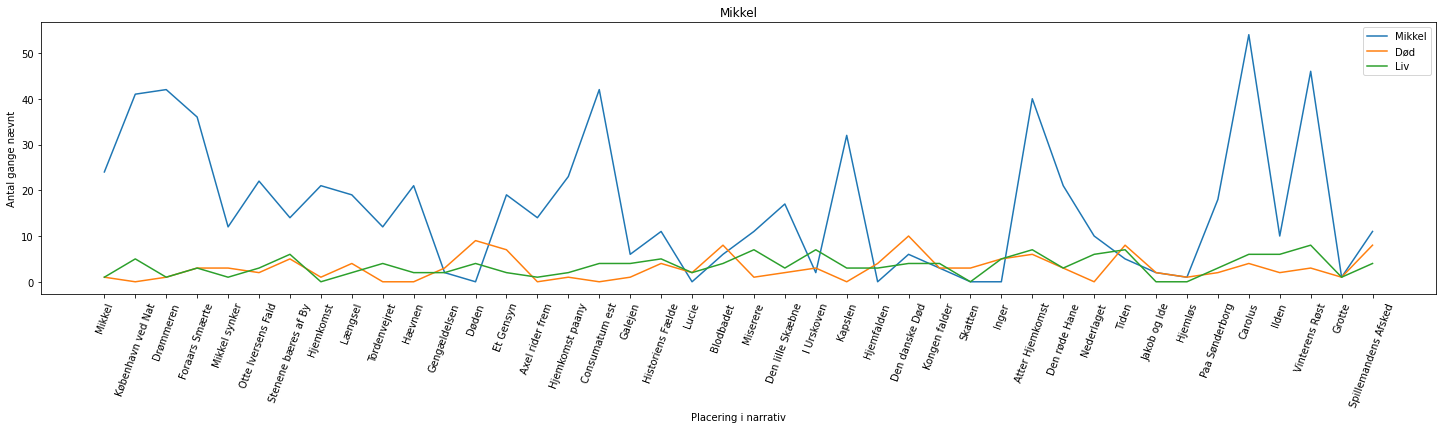

In [44]:
plt.figure(figsize=(25,5))

plt.title("Mikkel")

plt.plot(df_kap.Overskrift,df_kap.antalMikkel, label="Mikkel")
plt.plot(df_kap.Overskrift,df_kap.antalDød, label="Død")
plt.plot(df_kap.Overskrift,df_kap.antalLiv, label="Liv")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")
plt.xticks(rotation=70)

plt.legend()
plt.savefig("kf_kap_mikkel.png", bbox_inches = "tight", dpi=200)
plt.show()

# Litterær fortolkning
***
**Hvad** fortæller vores linjediagrammer om Teksten? **Hvordan** kan de understøtte vores **kvalitative** analyse af romanen?

**Hvad** fortæller diagrammet over personernes optræden i kapitlerne om **romanens struktur**?

**Hvad** fortæller diagrammet over Mikkels relation til ordene 'liv' og 'død' os om bearbejdelsen af **tematikkerne** i romanen?

Find **selv** på **flere spørgsmål**!
***

# 6. Gem data frame som csv-fil
For at gemme data-framen som csv-fil skal i bruge følgende kommando. Filnavnet er naturligvis valgfrit:

`df_kap.to_csv('KongensFald_kap_Personer.csv', index=False)`<br>
`df_del.to_csv('KongensFald_dele_Personer.csv', index=False)`

Tilføjelsen `index=False` sikrer, at data-framen ikke gemmes med det automatisk generede index (første kolonne: 0, 1, 2, osv.). Der genereres som default et nyt index, hver gang data-framen åbnes, og vi ville derfor have først to, så tre indekser osv., hvis vi gemmer indekse hver gang.

Filen gemmes som default i den fil-mappe, hvori scriptet er gemt.

**Gem** de to data-frames.

# Løsningsforslag: Funktion der splitter ved linjeskift

In [45]:
def split_linjer(text_0):
    text_linjer = text_0.split("\n")
    return text_linjer

# Løsningsforslag: Optælling vha. `find_navn()`

In [46]:
df_del["antalKongen"]  = df_del.Txt_del.apply(find_navn, args=('kongen',))
df_del["antalMikkel"]  = df_del.Txt_del.apply(find_navn, args=('mikkel',))
df_del["antalOtte"]  = df_del.Txt_del.apply(find_navn, args=('otte',))
df_del["antalSusanna"]  = df_del.Txt_del.apply(find_navn, args=('susanna',))
df_del["antalMette"]  = df_del.Txt_del.apply(find_navn, args=('mette',))
df_del["antalInger"]  = df_del.Txt_del.apply(find_navn, args=('inger',))
df_del["antalAxel"]  = df_del.Txt_del.apply(find_navn, args=('axel',))
df_del["antalIde"]  = df_del.Txt_del.apply(find_navn, args=('ide',))
df_del["antalChristiern"]  = df_del.Txt_del.apply(find_navn, args=('christiern',))

df_del["antalKongChr"] = df_del["antalChristiern"] + df_del["antalKongen"]

df_del.head()

,Txt_del,antalKongen,antalMikkel,antalOtte,antalSusanna,antalMette,antalInger,antalAxel,antalIde,antalChristiern,antalKongChr
0,"[kongens, fald, johannes, vilhelm, jensen, 191...",0,11,1,0,0,0,0,0,0,0
1,"[i, jylland, han, følte, sig, selv, staa, klej...",0,12,11,0,0,0,0,0,0,0
2,"[sig, tilbage, og, tog, afsked, saa, snart, de...",0,20,0,1,0,0,0,0,0,0
3,"[dreje, om, ad, købmagergade, for, at, gaa, hj...",0,22,2,0,0,0,0,0,2,2
4,"[bøjede, ind, i, et, berygtet, smug, nede, ved...",0,21,1,1,0,0,0,0,1,1


# Løsningsforslag: linjediagram af `df_del`

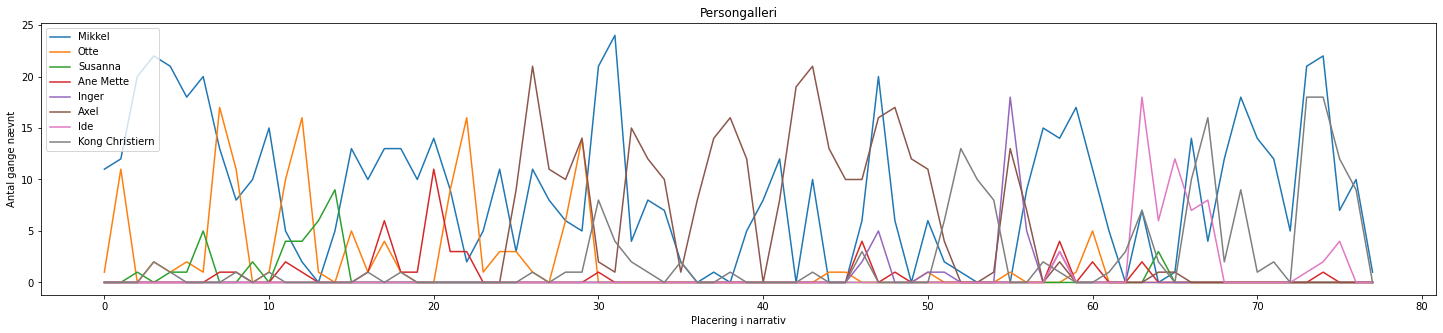

In [47]:
plt.figure(figsize=(25,5))

plt.title("Persongalleri")

plt.plot(df_del.index,df_del.antalMikkel, label="Mikkel")
plt.plot(df_del.index,df_del.antalOtte, label="Otte")
plt.plot(df_del.index,df_del.antalSusanna, label="Susanna")
plt.plot(df_del.index,df_del.antalMette, label="Ane Mette")
plt.plot(df_del.index,df_del.antalInger, label="Inger")
plt.plot(df_del.index,df_del.antalAxel, label="Axel")
plt.plot(df_del.index,df_del.antalIde, label="Ide")
plt.plot(df_del.index,df_del.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")

plt.legend()
plt.savefig("kf_dele_stolpe.pdf", bbox_inches = "tight", dpi=200)
plt.show()

# Løsningsforslag: søjlediagram af `df_del`

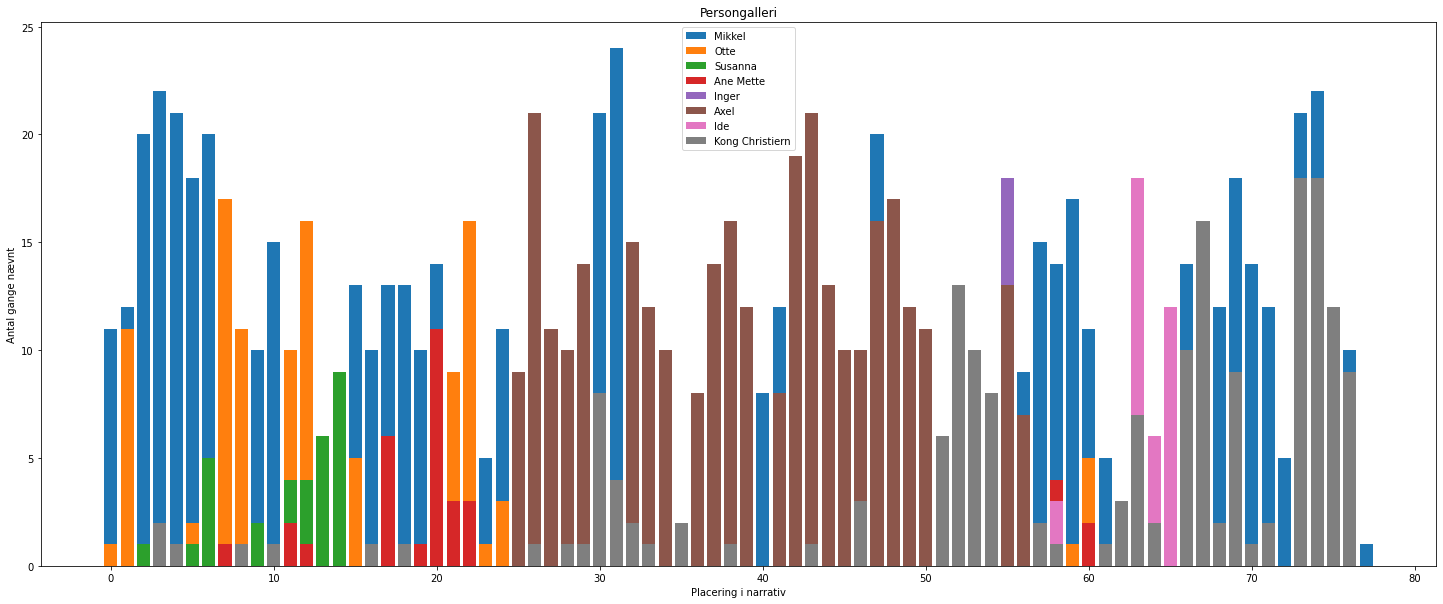

In [48]:
plt.figure(figsize=(25,10))

plt.title("Persongalleri")

plt.bar(df_del.index,df_del.antalMikkel, label="Mikkel")
plt.bar(df_del.index,df_del.antalOtte, label="Otte")
plt.bar(df_del.index,df_del.antalSusanna, label="Susanna")
plt.bar(df_del.index,df_del.antalMette, label="Ane Mette")
plt.bar(df_del.index,df_del.antalInger, label="Inger")
plt.bar(df_del.index,df_del.antalAxel, label="Axel")
plt.bar(df_del.index,df_del.antalIde, label="Ide")
plt.bar(df_del.index,df_del.antalKongChr, label="Kong Christiern")

plt.ylabel("Antal gange nævnt")
plt.xlabel("Placering i narrativ")

plt.legend()
plt.savefig("kf_dele_stolpe.png", bbox_inches = "tight", dpi=200)
plt.show()